#### Actividad Redes Neuronales Profundas - Problema 1

Andrés Alejandro Guzmáz González - A01633819

Llamado a librerías




In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

Carga de datos

In [ ]:
(train_images, train_labels),(test_images, test_labels) = datasets.fashion_mnist.load_data()

Proceso de normalización de las imágenes





In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
# Validación de respuestas "Labels"
print(train_labels)

[9 0 0 ... 3 0 5]


Mostramos un grid con el ejemplo de las imágenes

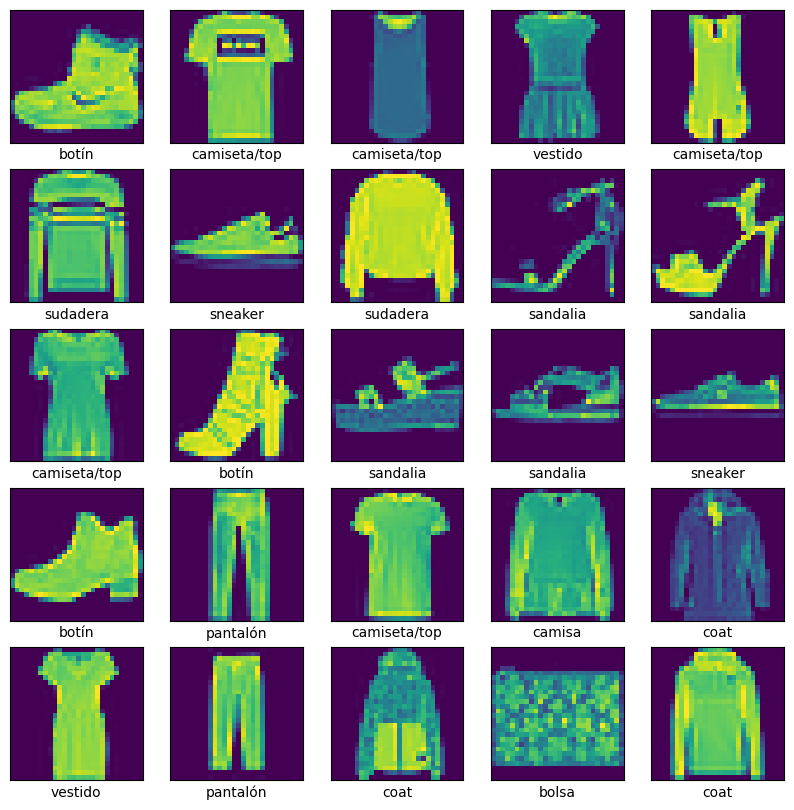

In [ ]:
class_names=['camiseta/top', 'pantalón', 'sudadera','vestido','coat','sandalia','camisa','sneaker','bolsa','botín']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Capas de convolución

In [ ]:
# Agrego las primeras 3 capas de convolución
model = models.Sequential()
# En la primer capa es necesario definir el tamaño de las imágenes de entrada.
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

Arquitectura

In [ ]:
'''
Mostramos la arquitectura de la red neuronal y se observa el cambio que
tienen las imágenes al pasar por cada una de las capas de convolución.
'''

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
Total params: 222080 (867.50 KB)
Trainable params: 222

Capas densas

In [ ]:
# Se agregan las capas densas a la red
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [ ]:
'''
Se procede a hacer el entrenaiento de la red y se definen la función de
optimización, la función de pérdida y las épocas de entrenamiento.
'''
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 104s 55ms/step - loss: 0.4586 - accuracy: 0.8337 - val_loss: 0.3670 - val_accuracy: 0.8663
Epoch 2/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2991 - accuracy: 0.8892 - val_loss: 0.3153 - val_accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2546 - accuracy: 0.9066 - val_loss: 0.2641 - val_accuracy: 0.9027
Epoch 4/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.2209 - accuracy: 0.9179 - val_loss: 0.2846 - val_accuracy: 0.8960
Epoch 5/10
1875/1875 [==============================] - 102s 55ms/step - loss: 0.1918 - accuracy: 0.9277 - val_loss: 0.2553 - val_accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1693 - accuracy: 0.9373 - val_loss: 0.2573 - val_accuracy: 0.9079
Epoch 7/10
1875/1875 [==============================] - 100s 54ms/step - loss: 0.1484 - accuracy: 0.9443 - val_loss: 0.2887 - val

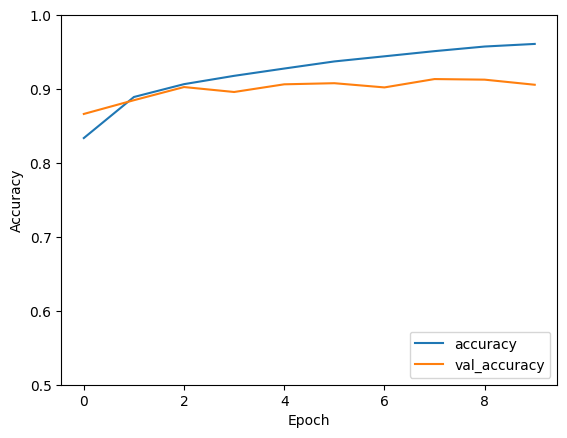

In [ ]:
# Gráfica para mostrar el accuracy de la red en cada época
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

#### Predicción

Pruba con un dato random del conjunto de imágenes para validar si la red lo clasifica correctamente


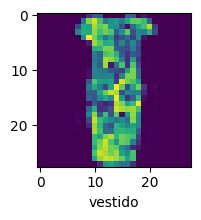

In [ ]:
n = 100 # Número de imagen

plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n]])
plt.show()

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np
print('La imagen pertenece al grupo {} con una probalididad de {:.2f}%'
      .format(class_names[np.argmax(predictions[n])], 100*np.max(predictions[n])))

313/313 [==============================] - 4s 12ms/step
[2.7665254e-01 8.1508613e-01 2.9295231e-03 9.9993777e-01 2.4824776e-01
 2.9144303e-05 7.5484276e-01 6.3609215e-04 7.7716359e-03 8.7610388e-06]
La imagen pertenece al grupo vestido con una probalididad de 99.99%
